# 특성 선택
- 새로운 특성을 만드는 방법은 무수히 많음. 원본 특성보다 훨씬 많은 특성을 만들 수 있다.
- 하지만 특성이 추가되면 모델은 더욱 복잡해지고, 과대적합될 가능성이 있음.
- 따라서 가장 유용한 특성만 선택하고, 나머지는 무시하여 특성의 수를 줄이는 것이 좋다.
- 특성을 선택하는 방법에는 3가지가 있음
- 일변량통계(univariate statistics), 모델기반선택(model-based selection), 반복적 선택(iterative selection)
- 특성을 선택할 때는 Train data만 특성 선택에 이용해야 한다.(Test set의 정보누설 방지용)

# Model-based selection

- 머신러닝 모델을 사용하여 특성의 중요도를 평가한 뒤 중요한 특성만 선택.
- 특성 선택을 위한 머신러닝 모델은 최종 사용 모델과 같을 필요는 없다.
- 특성 선택을 위한 머신러닝 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야함.
- ex. decision tree와 이를 기반으로 한 모델은 feature_importances_ 속성을 제공.
- 한번에 모든 특성을 고려하기 때문에, 특성간 상호작용도 반영될 수 있다.

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
# 중요도가 지정한 임계치보다 큰 모든 특성을 선택.(예제에서는 중간값을 임계치로 사용)

In [4]:
# data 준비
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [5]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:",X_train.shape)
print("X_train_l1.shape:",X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'feature number')

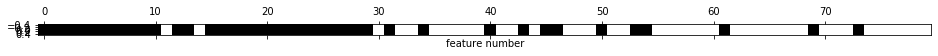

In [7]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("feature number")

In [8]:
from sklearn.linear_model import LogisticRegression
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1,y_test)
print("Test score:{:.3f}".format(score))

Test score:0.951


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# iterative Feature Selection(반복적 특성 선택)
- 특성을 하나도 선택하지 않은 상태에서, 종료 조건에 도달할때까지 하나씩 추가하는 방법이 있고,
- 특성을 모두 선택한 상태에서, 종료조건이 될 때까지 특성을 하나씩 제거하는 방법이 있음.
- ex. 재귀적특성제거(Recursive Feature Elimination)

In [9]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = 40)

Text(0.5, 0, 'feature number')

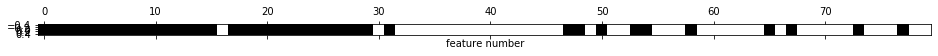

In [10]:
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("feature number")

In [11]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe,y_test)
print("Test score:{:.3f}".format(score))

Test score:0.951


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
print("Test score:{:.3f}".format(select.score(X_test,y_test)))
# RFE에 사용된 모델을 이용하여 직접 예측가능

Test score:0.951
